In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/caoshishi/Downloads/request2.txt', sep='\t', header=None, names=['hour','uid','dis','lives'])
df.head(5)

,hour,uid,dis,lives
0,5,107231,1,26
1,5,107231,2,20
2,5,107231,3,23
3,5,159556,1,21
4,5,159556,2,28


In [10]:
#主播数分组
bins = list(range(0,31,5))+list(range(40,101,10))+[500]
df['live_grp'] = pd.cut(df.lives,bins=bins,right=False,labels=list(range(1,len(bins))))
df.tail(5)

,hour,uid,dis,lives,live_grp
75974,22,2047882287,2,14,3
75975,22,2047882287,3,227,14
75976,22,2047957854,1,100,14
75977,22,2047957854,2,245,14
75978,22,2047957854,3,134,14


In [30]:
#df.fillna(0,inplace=True)
#df = df[df.level.notnull()].sort_values(by=['ymd','level'])
#df_result = df.groupby(['level','live_uid'],as_index=False)['show_pv','shows_per_user'].mean()
#df_result.to_csv('/Users/caoshishi/Downloads/home_show.txt')
##统计各时段的不同距离主播的密度分布情况
#def draw(df,hr):
#    df = df[df.hour==hr]
#    plt.rcParams['font.sans-serif'] = ['SimHei'] #正常显示中文标签
#    fig,ax=plt.subplots(figsize=(12,8))
#    df.loc[df.dis==1,'lives'].plot(kind='kde',style='r-', ax=ax,legend=True,label='10-')
#    df.loc[df.dis==2,'lives'].plot(kind='kde',style='g-', ax=ax,legend=True,label='10-50')
#    df.loc[df.dis==3,'lives'].plot(kind='kde',style='b-', ax=ax,legend=True,label='50-100')
#    df.loc[df.dis==4,'lives'].plot(kind='kde',style='y-', ax=ax,legend=True,label='100-200')
#    df.loc[df.dis==5,'lives'].plot(kind='kde',style='brown', ax=ax,legend=True,label='200-250')
#    df.loc[df.dis==6,'lives'].plot(kind='kde',color='gray', ax=ax,legend=True,label='250-300')
#    df.loc[df.dis==7,'lives'].plot(kind='kde',style='k-', ax=ax,legend=True,label='300+')
#    ax.set_title('不同距离范围的主播数分布',fontsize=18,fontweight='bold',color='brown',alpha=0.6)
#    ax.set_xlabel('主播数',fontsize=12)
#    ax.set_ylabel('主播数',fontsize=12)
#    #ax.set(title='不同距离范围的主播数分布',xlabel='主播数',ylabel='频率')
#    ax.set_xlim([0,50])
#    fig.savefig('/Users/caoshishi/Downloads/request2_9.png', transparent=False, dpi=80, bbox_inches="tight")
df1=df[df.hour==22].groupby(['live_grp','dis'])['uid'].count().unstack()
#df.groupby(['hour','dis'])['uid'].count().sort_index()
df1

dis,1,2,3
live_grp,,,
1,821,387,165
2,643,537,22
3,326,542,33
4,447,575,48
5,352,451,43
6,324,375,47
7,547,589,65
8,490,620,177
9,328,407,305


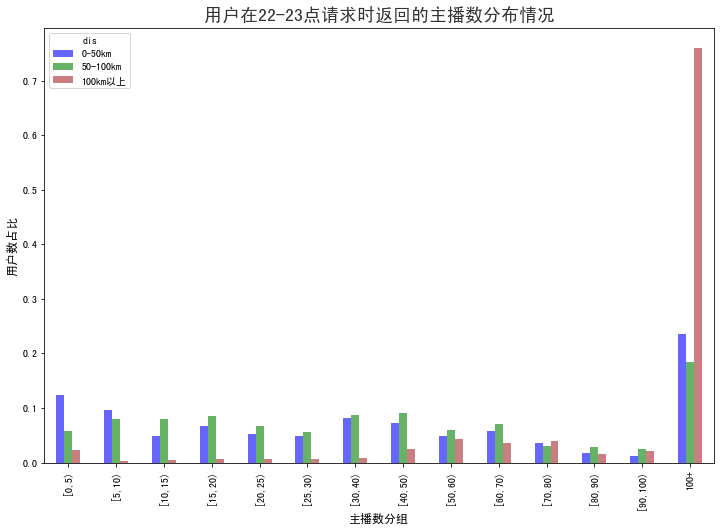

In [31]:
## 不同距离的主播分组下的用户占比统计
#df1 = df[df.dis==6]
plt.rcParams['font.sans-serif'] = ['SimHei'] #正常显示中文标签
fig,ax=plt.subplots(figsize=(12,8))
df1['0-50km'] = df1.iloc[:,0]/(df1.iloc[:,0].sum(axis=0))
df1['50-100km'] = df1.iloc[:,1]/(df1.iloc[:,1].sum(axis=0))
df1['100km以上'] = df1.iloc[:,2]/(df1.iloc[:,2].sum(axis=0))
df1[['0-50km','50-100km','100km以上']].plot(kind='bar',sharey=True,color=['blue','green','brown'],alpha=0.6, ax=ax,legend=True)
ax.set_title('用户在22-23点请求时返回的主播数分布情况',fontsize=18,fontweight='bold',color='black',alpha=0.8)
ax.set_ylabel('用户数占比',fontsize=12)
ax.set_xlabel('主播数分组',fontsize=12)
ax.set_xticklabels(['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,40)','[40,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100)','100+'])
#
fig.savefig('/Users/caoshishi/Downloads/request2_100.png', transparent=False, dpi=80, bbox_inches="tight")

In [4]:
##pv分桶查看uv的分布情况
#import matplotlib
#font=matplotlib.font_manager.FontProperties(fname='/Users/caoshishi/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
#df1 = df.loc[df.durppv>0,['type','durppv','uv','reten']]
#bins = list(range(0,601,30))+list(range(660,1801,60))+list(range(2100,5101,300))+[73000]
#df1['durppv_grp'] = pd.cut(df1.durppv, bins=bins, labels=list(range(1,len(bins))))
#df1 = df1.groupby(['type','durppv_grp'], as_index=False)['uv','reten'].sum()
##df1[df1.type=='high'].sort_values(by='uv')
#df1["retention"] = round(df1.reten/df1.uv,4)
#df1 = df1.pivot_table('retention',index='durppv_grp',columns='type')
#df1.plot(kind='line',style='o-',figsize=(12,5),alpha=0.6,xlim=[0,24],grid=True)
#plt.legend(loc='lower right')
#plt.title('The Retention Of Different Users By 次均观看时长',fontproperties=font)
#plt.savefig('/Users/caoshishi/Downloads/figpath.png', dpi=400, bbox_inches='tight')
df_pv = df.groupby(['ymd','level','show_pv_grp']).agg({'show_pv':'sum','shows_per_user':'mean'}).reset_index()
#pd.cut(df_result.shows_per_user,bins=np.arange(1,4.1,0.3))
df_pv.head(5)

,ymd,level,show_pv_grp,show_pv,shows_per_user
0,20190829,A,1,456,1.000000
1,20190829,A,2,19705,1.038590
2,20190829,A,3,150525,1.093878
3,20190829,A,4,408967,1.154575
4,20190829,A,5,1796917,1.247103


In [5]:
#from matplotlib.font_manager import findfont, FontProperties
#findfont(FontProperties(family=FontProperties().get_family())
df_pv.groupby(['level','show_pv_grp'])['show_pv','shows_per_user'].mean().to_csv('/Users/caoshishi/Downloads/percent_result.txt')